<a href="https://colab.research.google.com/github/SaketKaswa20/Live_Stock_Price_Prediction_Using_YFinance/blob/main/LiveStockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [17]:
start= '2010-01-01'
end= '2022-12-31'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059387,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200


In [19]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [20]:
df=df.drop(['Date','Adj Close'],axis=1)

In [21]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


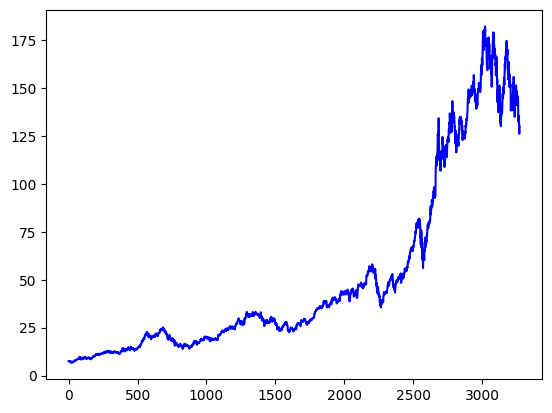

In [22]:
plt.plot(df.Close, 'b')

In [23]:
moveavg100=df.Close.rolling(100).mean() #Moving Average 100
moveavg100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

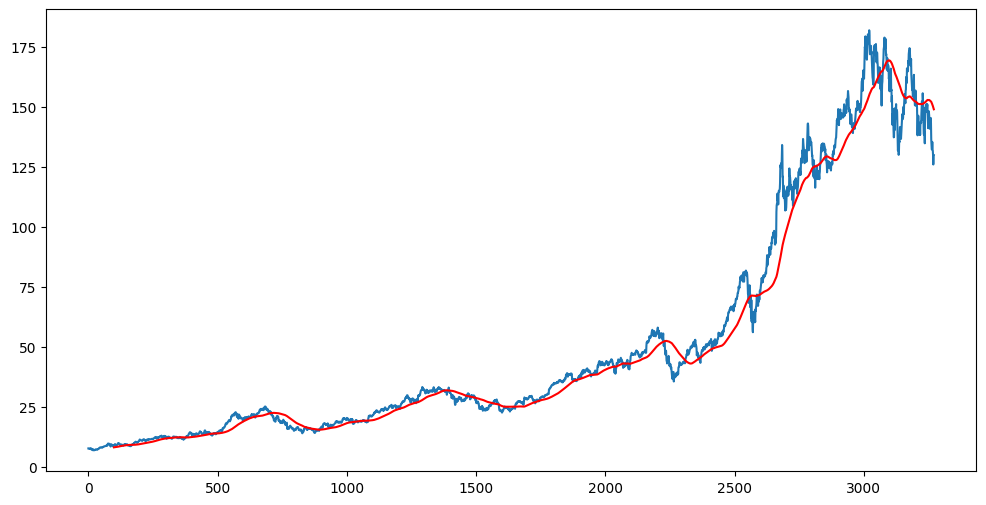

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moveavg100, 'r') #That r specifies red colour

In [25]:
moveavg200=df.Close.rolling(200).mean() #Moving Average 200
moveavg100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

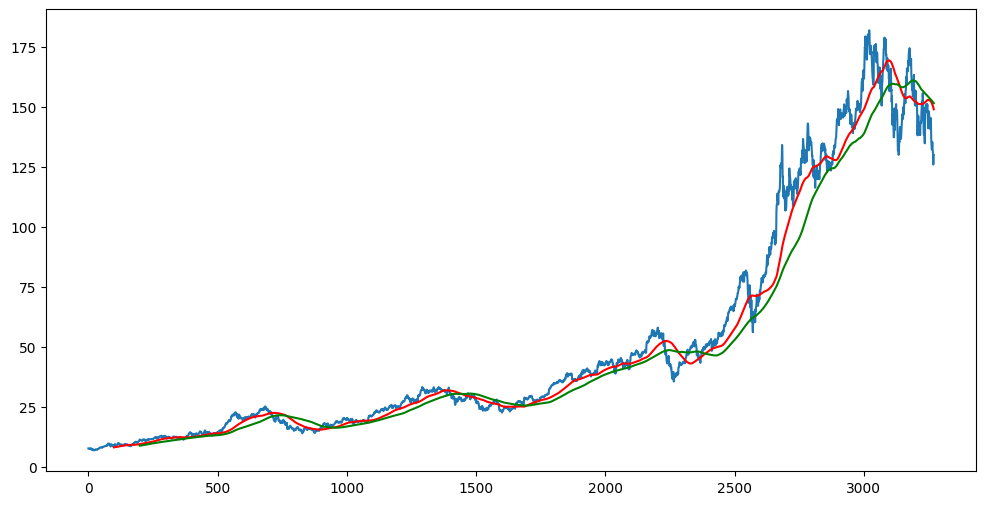

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moveavg100, 'r') #That r specifies red colour
plt.plot(moveavg200, 'g') #That g specifies green colour

In [27]:
df.shape

(3272, 5)

In [28]:
#Splitting Data into Training and Testing

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) #Keeping 70% Data for training that's why 0.7
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [29]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [71]:
from sklearn.preprocessing import MinMaxScaler #To Scale data between 0 and 1
scaler= MinMaxScaler(feature_range=(0,1))

In [31]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [32]:
data_training_array.shape

(2290, 1)

In [53]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train= np.array(x_train), np.array(y_train)


In [54]:
x_train.shape

(2190, 100, 1)

## ML MODEL

In [35]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [36]:
model=Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) #Only 1 unit because we are prediciting only closing price

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [56]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
69/69 [==============================] - 27s 315ms/step - loss: 0.0249
Epoch 2/50
69/69 [==============================] - 20s 293ms/step - loss: 0.0068
Epoch 3/50
69/69 [==============================] - 23s 338ms/step - loss: 0.0055
Epoch 4/50
69/69 [==============================] - 23s 331ms/step - loss: 0.0047
Epoch 5/50
69/69 [==============================] - 20s 296ms/step - loss: 0.0046
Epoch 6/50
69/69 [==============================] - 21s 308ms/step - loss: 0.0041
Epoch 7/50
69/69 [==============================] - 22s 313ms/step - loss: 0.0039
Epoch 8/50
69/69 [==============================] - 20s 293ms/step - loss: 0.0040
Epoch 9/50
69/69 [==============================] - 22s 312ms/step - loss: 0.0039
Epoch 10/50
69/69 [==============================] - 22s 317ms/step - loss: 0.0034
Epoch 11/50
69/69 [==============================] - 21s 303ms/step - loss: 0.0031
Epoch 12/50
69/69 [==============================] - 22s 321ms/step - loss: 0.0032
Epoch 13/50
6

In [58]:
model.save('keras_model.h5')

In [66]:
past_100_days=data_training.tail(100)

In [67]:
final_df= past_100_days.append(data_testing, ignore_index=True)

<ipython-input-67-cdf4f417b3b1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= past_100_days.append(data_testing, ignore_index=True)


In [72]:
input_data=scaler.fit_transform(final_df)

In [74]:
input_data.shape

(1082, 1)

In [75]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [76]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


## Making Predictions

In [77]:
y_predicted= model.predict(x_test)

31/31 [==============================] - 3s 84ms/step


In [78]:
y_predicted

array([[0.09375525],
       [0.09426515],
       [0.09484097],
       [0.09546086],
       [0.09610617],
       [0.09676123],
       [0.09741335],
       [0.0980531 ],
       [0.09867662],
       [0.09928046],
       [0.09986255],
       [0.10042988],
       [0.10099021],
       [0.10155007],
       [0.1021072 ],
       [0.10266036],
       [0.10321322],
       [0.10376707],
       [0.10431655],
       [0.10484624],
       [0.10534112],
       [0.10581329],
       [0.10629156],
       [0.10680343],
       [0.10737433],
       [0.10802913],
       [0.10878935],
       [0.10965848],
       [0.1106315 ],
       [0.11172391],
       [0.11293355],
       [0.11423075],
       [0.1155695 ],
       [0.11691038],
       [0.11822377],
       [0.11949249],
       [0.12071183],
       [0.12189338],
       [0.12305607],
       [0.12421557],
       [0.12538546],
       [0.12658606],
       [0.12782794],
       [0.12911502],
       [0.13043511],
       [0.13176727],
       [0.13309023],
       [0.134

In [79]:
scaler= scaler.scale_
scaler

array([0.00682769])

In [80]:
scale_factor=1/0.00682769
y_predicted= y_predicted * scale_factor
y_test= y_test * scale_factor

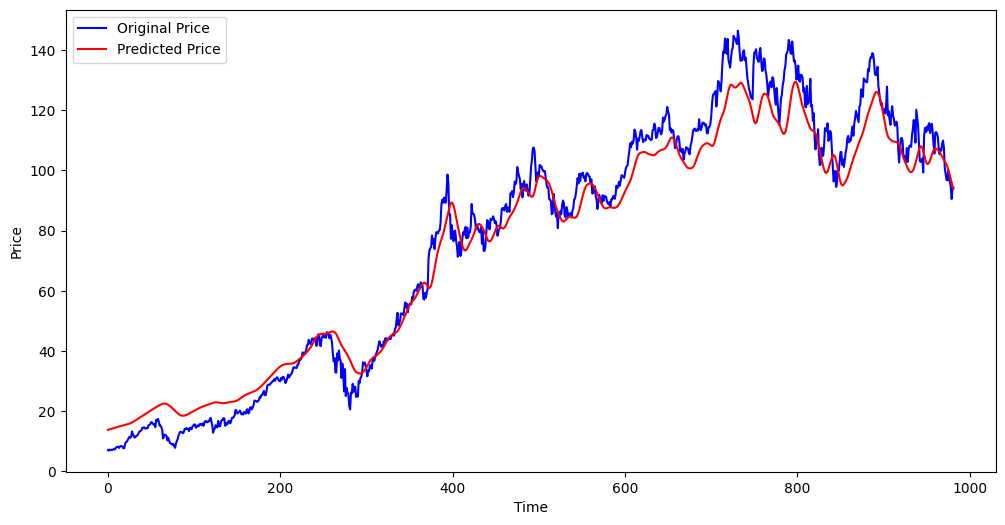

In [81]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [82]:
# @title Setup code
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
# import subprocess
# subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
--2023-11-01 07:27:32--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2023.10.0/cloudflared-linux-amd64 [following]
--2023-11-01 07:27:32--  https://github.com/cloudflare/cloudflared/releases/download/2023.10.0/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting

In [87]:
%%writefile app.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from keras.models import load_model
import streamlit as st


st.title('Stock Market Prediction')

start= '2010-01-01'
end= '2022-12-31'

df = yf.download('AAPL', start, end)
user_input=st.text_input('Enter Stock Ticker', 'AAPL')
df = yf.download(user_input, start, end)

#Describing Data
st.subheader('Data from 2010 to 2022')
st.write(df.describe())

#Visualizations
st.subheader('Closing Price v/s Time Chart')
fig= plt.figure(figsize=(12,6))
plt.plot(df.Close)
st.pyplot(fig)

st.subheader('Closing Price v/s Time Chart with 100 Moving Average')
ma100= df.Close.rolling(100).mean()
fig= plt.figure(figsize=(12,6))
plt.plot(ma100, label= 'MA 100')
plt.plot(df.Close, label= 'Closing Price')
st.pyplot(fig)

st.subheader('Closing Price v/s Time Chart with 100 & 200 Moving Average')
ma100= df.Close.rolling(100).mean()
ma200= df.Close.rolling(200).mean()
fig= plt.figure(figsize=(12,6))
plt.plot(ma100, label='MA 100')
plt.plot(ma200, label='MA 200')
plt.plot(df.Close, label='Closing Price')
st.pyplot(fig)

#Splitting Data into Training and Testing

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) #Keeping 70% Data for training that's why 0.7
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

from sklearn.preprocessing import MinMaxScaler #To Scale data between 0 and 1
scaler= MinMaxScaler(feature_range=(0,1))

data_training_array= scaler.fit_transform(data_training)

#Load my model
model= load_model('keras_model.h5')

#Testing Part
past_100_days=data_training.tail(100)
final_df= past_100_days.append(data_testing, ignore_index=True)
input_data=scaler.fit_transform(final_df)

x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

x_test, y_test= np.array(x_test), np.array(y_test)
y_predicted= model.predict(x_test)

scaler= scaler.scale_

scale_factor=1/scaler[0]
y_predicted= y_predicted * scale_factor
y_test= y_test * scale_factor

#Final Visualization
st.subheader('Predictions v/s Original')
fig2=plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
st.pyplot(fig2)


Overwriting app.py


In [85]:
!streamlit run /content/app.py &>/content/logs.txt &

In [86]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"

Your tunnel url https://carolina-preserve-speakers-refinance.trycloudflare.com
